In [82]:
using CSV, DataFrames
using FileIO, Dates
using Graphs, MetaGraphs
using DataStructures
using PyCall
using Plots, PyPlot; gr()

include("./src/cubes.jl")
include("./src/network.jl")

@pyimport powerlaw as powlaw

In [83]:
region = "california"
mkpath("./results/$region")

df = CSV.read("./data/$(region).csv", DataFrame);

In [90]:
magnitude_threshold = 2.0
df = df[df.Magnitude .> magnitude_threshold,:];

In [92]:
degrees_alpha=[]
indegrees_alpha=[]
outdegrees_alpha=[]

degrees_xmin=[]
indegrees_xmin=[]
outdegrees_xmin=[]
for side=1:20
    df, df_cubes = region_cube_split(df,side=side)
    MG = create_network(df, df_cubes)
    degrees=[]
    indegrees=[]
    outdegrees=[]
    for i in 1:nv(MG)
        push!(degrees, get_prop(MG, i, :degree))
        push!(indegrees, get_prop(MG, i, :indegree))
        push!(outdegrees, get_prop(MG, i, :outdegree))
    end

    fit_degrees = powlaw.Fit(degrees);
    fit_indegrees = powlaw.Fit(indegrees);
    fit_outdegrees = powlaw.Fit(outdegrees);


    push!(degrees_alpha, fit_degrees.alpha)
    push!(indegrees_alpha, fit_indegrees.alpha)
    push!(outdegrees_alpha, fit_outdegrees.alpha)

    push!(degrees_xmin, fit_degrees.xmin)
    push!(indegrees_xmin, fit_indegrees.xmin)
    push!(outdegrees_xmin, fit_outdegrees.xmin);

end

Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law

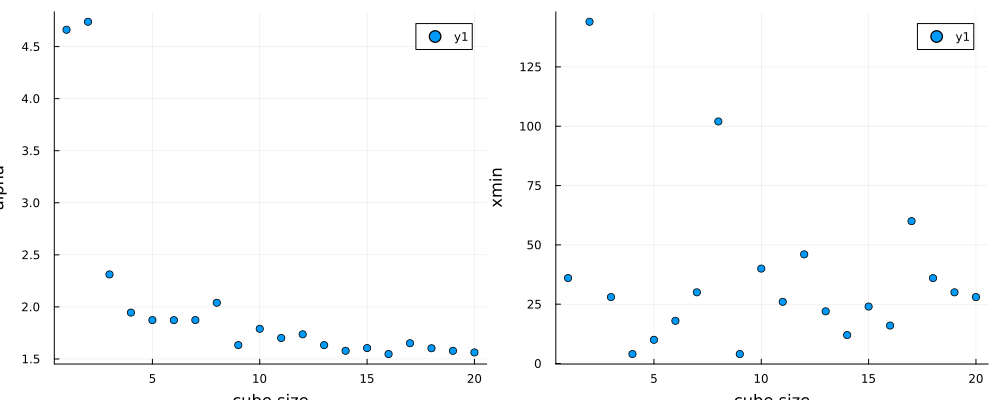

In [93]:
p1 = Plots.scatter(1:20,degrees_alpha, xlabel="cube size", ylabel="alpha");
# vspan!([2,13], linecolor = :grey, fillcolor = :grey, alpha=0.3, label="")
# hspan!([2,3], linecolor = :red, fillcolor = :red, alpha=0.3, label="")
# hspan!([1.5,2], linecolor = :red, fillcolor = :red, alpha=0.2, label="")
p2 = Plots.scatter(1:20,degrees_xmin, xlabel="cube size", ylabel="xmin");
# vspan!([2,13], linecolor = :grey, fillcolor = :grey, alpha=0.3, label="")
fig = Plots.plot(p1,p2, layout=(1,2), figsize=(10,15))
plot!(size=(1000,400))
Plots.savefig("./results/$region/$(region)_mag_$(magnitude_threshold)_alpha_xmin_dependency_side.png")
fig

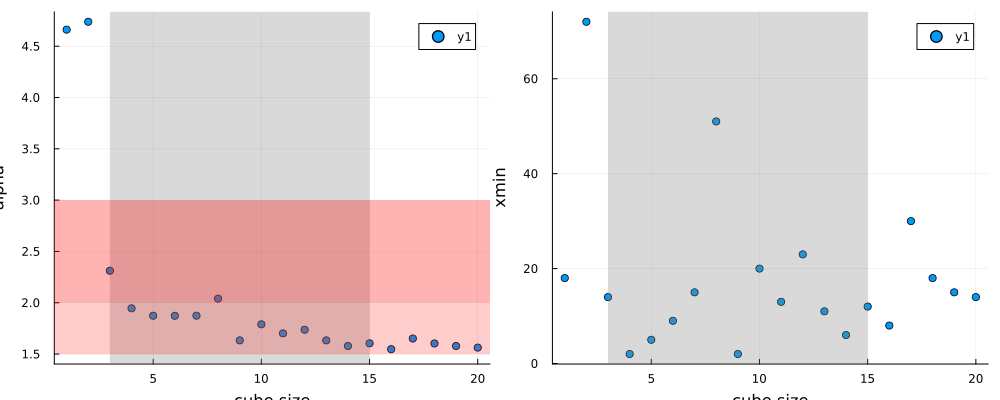

In [94]:
p1 = Plots.scatter(1:20, indegrees_alpha[1:end], xlabel="cube size", ylabel="alpha");
# vline!([5,10])
# hline!([2,3])
vspan!([3,15], linecolor = :grey, fillcolor = :grey, alpha=0.3, label="")
hspan!([2,3], linecolor = :red, fillcolor = :red, alpha=0.3, label="")
hspan!([1.5,2], linecolor = :red, fillcolor = :red, alpha=0.2, label="")

p2 = Plots.scatter(1:20, indegrees_xmin[1:end], xlabel="cube size", ylabel="xmin");
vspan!([3,15], linecolor = :grey, fillcolor = :grey, alpha=0.3, label="")
fig = Plots.plot(p1,p2, layout=(1,2), figsize=(10,15))
plot!(size=(1000,400))
Plots.savefig("./results/$region/$(region)_mag_$(magnitude_threshold)_alpha_xmin_dependency_side_areas.png")
fig

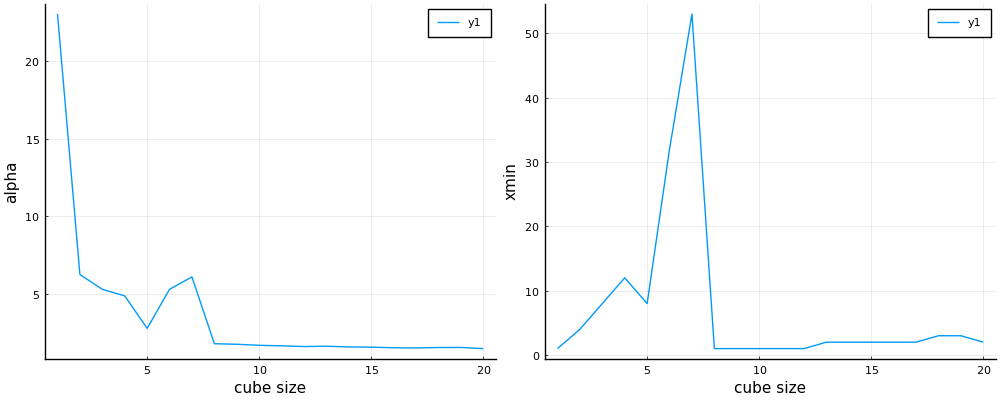

In [30]:
p1 = Plots.plot(1:20,outdegrees_alpha, xlabel="cube size", ylabel="alpha");
p2 = Plots.plot(1:20,outdegrees_xmin, xlabel="cube size", ylabel="xmin");
Plots.plot(p1,p2, layout=(1,2), figsize=(10,15))
plot!(size=(1000,400))

Calculating best minimal value for power law fit
C:\Users\gabipana\.julia\conda\3\lib\site-packages\powerlaw.py:1007: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


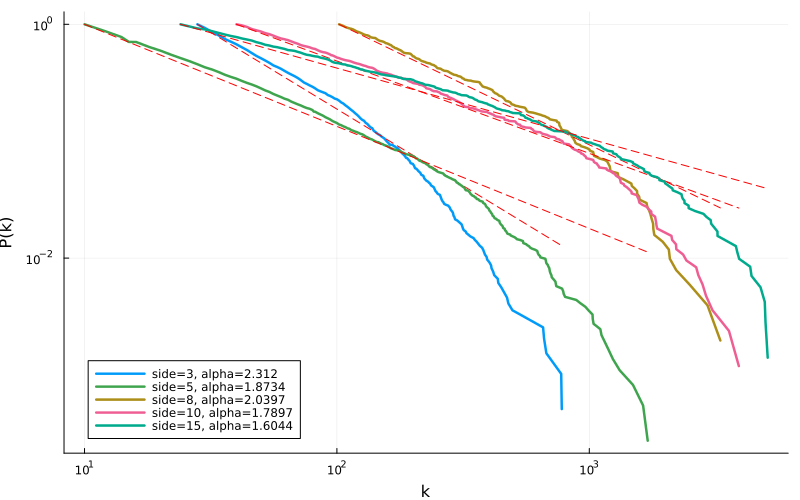

In [95]:
Plots.plot(xlabel = "k", ylabel = "P(k)")
for side in [3,5,8,10,15]
    df, df_cubes = region_cube_split(df,side=side)
    MG = create_network(df, df_cubes)
    degrees=[]
    # indegrees=[]
    # outdegrees=[]
    for i in 1:nv(MG)
        push!(degrees, get_prop(MG, i, :degree))
        # push!(indegrees, get_prop(MG, i, :indegree))
        # push!(outdegrees, get_prop(MG, i, :outdegree))
    end

    fit = powlaw.Fit(degrees);
    alpha = round(fit.alpha,digits=4)

    # CCDF of data truncated
    x_ccdf, y_ccdf = fit.ccdf()
    Plots.plot!(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10, label="side=$side, alpha=$alpha", linewidth=2.5)
    
    # Theoretical power_law
    
    fit_degrees_power_law = fit.power_law.plot_ccdf()[:lines][1]
    x_powlaw, y_powlaw = fit_degrees_power_law[:get_xdata](), fit_degrees_power_law[:get_ydata]()
    Plots.plot!(x_powlaw, y_powlaw, xscale=:log10, yscale=:log10, label="", color=:red, linestyle=:dash) #label="power law, alpha=$(alpha)")
    
    # # Theoretical lognormal
    # mu = round(fit.lognormal.mu, digits=4)
    # fit_degrees_lognormal = fit.lognormal.plot_ccdf()[:lines][1]
    # x_lognormal, y_lognormal = fit_degrees_lognormal[:get_xdata](), fit_degrees_lognormal[:get_ydata]()
    # Plots.plot!(x_lognormal, y_lognormal, xscale=:log10, yscale=:log10, label="") #label="lognormal, mu=$(mu)")

end
plot!(size=(800,500), legend=:bottomleft)
current()
Plots.savefig("./results/$region/$(region)_mag_$(magnitude_threshold)_ccdfs_and_fits.png")
current()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


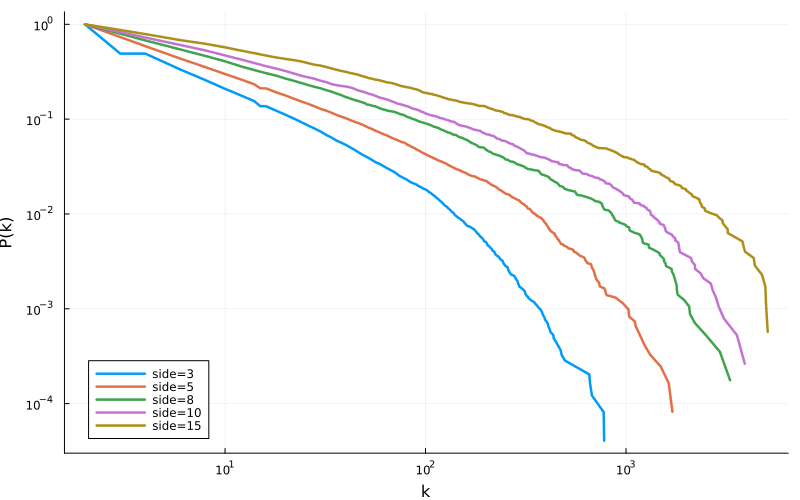

In [96]:
Plots.plot(xlabel = "k", ylabel = "P(k)")
for side in [3,5,8,10,15]
    df, df_cubes = region_cube_split(df,side=side)
    MG = create_network(df, df_cubes)
    degrees=[]
    # indegrees=[]
    # outdegrees=[]
    for i in 1:nv(MG)
        push!(degrees, get_prop(MG, i, :degree))
        # push!(indegrees, get_prop(MG, i, :indegree))
        # push!(outdegrees, get_prop(MG, i, :outdegree))
    end

    fit = powlaw.Fit(degrees);
    alpha = round(fit.alpha,digits=4)

    # CCDF of data truncated
    x_ccdf, y_ccdf = fit.ccdf(original_data=true)
    Plots.plot!(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10, label="side=$side", linewidth=2.5)
    
    # Theoretical power_law
    
    # fit_degrees_power_law = fit.power_law.plot_ccdf()[:lines][1]
    # x_powlaw, y_powlaw = fit_degrees_power_law[:get_xdata](), fit_degrees_power_law[:get_ydata]()
    # Plots.plot!(x_powlaw, y_powlaw, xscale=:log10, yscale=:log10, label="", color=:red, linestyle=:dash) #label="power law, alpha=$(alpha)")
    
    # # Theoretical lognormal
    # mu = round(fit.lognormal.mu, digits=4)
    # fit_degrees_lognormal = fit.lognormal.plot_ccdf()[:lines][1]
    # x_lognormal, y_lognormal = fit_degrees_lognormal[:get_xdata](), fit_degrees_lognormal[:get_ydata]()
    # Plots.plot!(x_lognormal, y_lognormal, xscale=:log10, yscale=:log10, label="") #label="lognormal, mu=$(mu)")

end
plot!(size=(800,500), legend=:bottomleft)
current()
Plots.savefig("./results/$region/$(region)_mag_$(magnitude_threshold)_ccdfs_and_fits_original_data.png")
current()

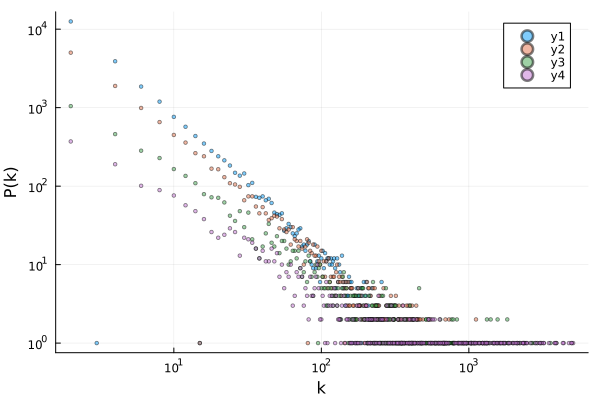

In [97]:

Plots.plot(xlabel = "k", ylabel = "P(k)")
for side in [3,5,10,15]
    df, df_cubes = region_cube_split(df,side=side)
    MG = create_network(df, df_cubes)
    degrees=[]
    # indegrees=[]
    # outdegrees=[]
    for i in 1:nv(MG)
        push!(degrees, get_prop(MG, i, :degree))
        # push!(indegrees, get_prop(MG, i, :indegree))
        # push!(outdegrees, get_prop(MG, i, :outdegree))
    end
    
    d = counter(degrees)
    Plots.scatter!(collect(keys(d)),collect(values(d)),xscale=:log10,yscale=:log10, markersize = 2, alpha=0.5)
end

current()

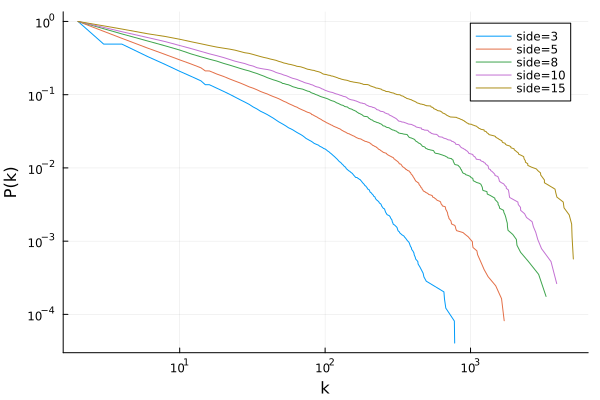

In [98]:
Plots.plot(xlabel = "k", ylabel = "P(k)")
for side in [3,5,8,10,15]
    df, df_cubes = region_cube_split(df,side=side)
    MG = create_network(df, df_cubes)
    degrees=[]
    indegrees=[]
    outdegrees=[]
    for i in 1:nv(MG)
        push!(degrees, get_prop(MG, i, :degree))
        push!(indegrees, get_prop(MG, i, :indegree))
        push!(outdegrees, get_prop(MG, i, :outdegree))
    end
    
    # fit_degrees = powlaw.Fit(degrees)
    x_ccdf, y_ccdf = powlaw.ccdf(degrees)
    Plots.plot!(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10, label="side=$side")
end

current()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


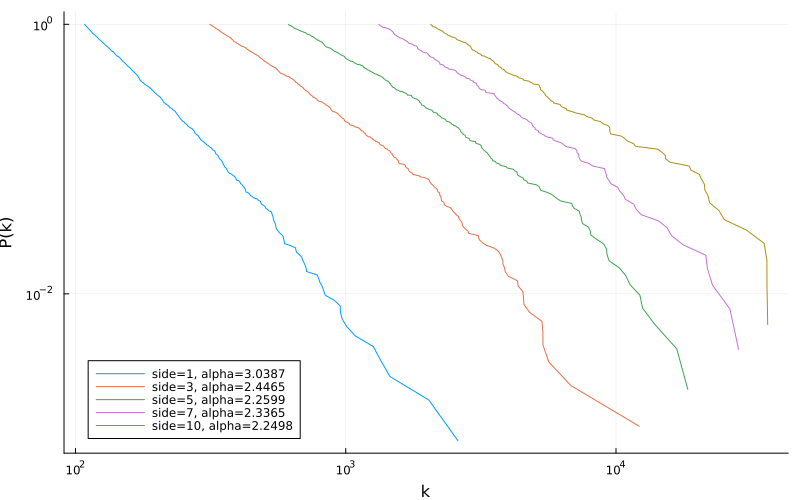

In [11]:

Plots.plot(xlabel = "k", ylabel = "P(k)")
for side in [1,3,5,7,10]
    df, df_cubes = region_cube_split(df,side=side)
    MG = create_network(df, df_cubes)
    degrees=[]
    indegrees=[]
    outdegrees=[]
    for i in 1:nv(MG)
        push!(degrees, get_prop(MG, i, :degree))
        push!(indegrees, get_prop(MG, i, :indegree))
        push!(outdegrees, get_prop(MG, i, :outdegree))
    end

    fit_degrees = powlaw.Fit(degrees)
    x_ccdf, y_ccdf = fit_degrees.ccdf()
    alpha = round(fit_degrees.alpha, digits=4)
    Plots.plot!(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10, label="side=$side, alpha=$(alpha)")
end
plot!(size=(800,500), legend=:bottomleft)
current()